In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()

In [88]:
def find_distance(point1,point2):
    return np.linalg.norm(point1 - point2) 

def find_cluster(data_point, clusters):
    distances=list(map(lambda cluster: find_distance(data_point, cluster), clusters))
    return np.argmin(distances)

# def get_cost(clusters, data):
#     cluster_assignments=np.array(list(map(lambda point: find_cluster(point, clusters), data)))
#     for i in range(len(clusters)):
#         temp=cluster_assignments==i
#         filtered_points=data[temp]
    
def get_lloyd_clusters(data, cluster_count):
#     data contains n points. Each point is a list of dim dimensions
    dim=len(data[0])
    clusters=rng.standard_normal((cluster_count, dim))
    prev_clusters=np.zeros((cluster_count, dim))
    cluster_assignments=None
    while(not np.array_equal(clusters, prev_clusters)):
        prev_clusters=clusters
        cluster_assignments=np.array(list(map(lambda point: find_cluster(point, clusters), data)))
        clusters=[]
        for i in range(cluster_count):
            temp=cluster_assignments==i
            filtered_points=data[temp]
            if(len(filtered_points)==0):
                clusters.append(np.zeros(dim))
            else:
                clusters.append(np.mean(filtered_points, axis=0))
        clusters=np.array(clusters)
    
    
    return clusters, cluster_assignments
    
        
    
# x=np.array([[0,0],[0,1],[3,0],[3,1]])
# get_lloyd_clusters(x, 2)    

In [65]:
def radians(degree):
    return degree*math.pi/180
r1=5
r2=10
x1=[[r1*math.cos(radians(x)),r1*math.sin(radians(x))] for x in range(0, 360, 10)]
x2=[[r2*math.cos(radians(x)),r2*math.sin(radians(x))] for x in range(0, 360, 10)]
data=np.array(x1+x2)
data_x=data[:,0]
data_y=data[:,1]
clusters, cluster_assignments=get_lloyd_clusters(data, 2)
clusters_x=clusters[:,0]
clusters_y=clusters[:,1]
plt.scatter(data_x, data_y, c=cluster_assignments)
plt.scatter(clusters_x, clusters_y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

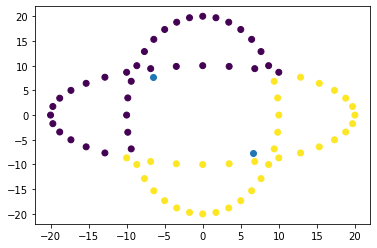

In [66]:
def radians(degree):
    return degree*math.pi/180
a=20
b=10
x1=[[a*math.cos(radians(x)),b*math.sin(radians(x))] for x in range(0, 360, 10)]
x2=[[b*math.cos(radians(x)),a*math.sin(radians(x))] for x in range(0, 360, 10)]
data=np.array(x1+x2)
data_x=data[:,0]
data_y=data[:,1]
clusters, cluster_assignments=get_lloyd_clusters(data, 2)
clusters_x=clusters[:,0]
clusters_y=clusters[:,1]
plt.scatter(data_x, data_y, c=cluster_assignments)
plt.scatter(clusters_x, clusters_y)
plt.show


In [117]:
def radians(degree):
    return degree*math.pi/180
r=10
x1=[[r*math.cos(radians(x)),r*math.sin(radians(x))] for x in range(0, 180, 5)]
print(len(x1))
x2=[[r*math.cos(radians(x))+10,r*math.sin(radians(x))+5] for x in range(180, 360, 5)]
data=np.array(x1+x2)
data_x=data[:,0]
data_y=data[:,1]
clusters, cluster_assignments=get_lloyd_clusters(data, 2)
clusters_x=clusters[:,0]
clusters_y=clusters[:,1]
plt.scatter(data_x, data_y, c=cluster_assignments)
plt.scatter(clusters_x, clusters_y)
plt.show

36


<function matplotlib.pyplot.show(close=None, block=None)>

In [142]:
def dot_prod_in_transformed_space(point1,point2, kernel):
    if kernel=='linear':
        return np.dot(point1, point2)
    if kernel=='quadratic':
        return (1+np.dot(point1, point2))**2
    if kernel=='rbf':
        return math.exp(-np.linalg.norm(point1-point2)**2)
    
def find_distance(point1,point2):
    return np.linalg.norm(point1 - point2)

def find_cluster(data_point, clusters):
    distances=list(map(lambda cluster: find_distance(data_point, cluster), clusters))
    return np.argmin(distances)

def get_alpha_array(cluster_assignments, k):
    n=len(cluster_assignments)
    z=np.zeros((n, k));
    for i in range(n):
        z[i][cluster_assignments[i]]=1
    
    sums=np.sum(z, axis=0)
    return z/sums


def get_distance_kernel(data, alpha, i, cluster, kernel, dot_products):
    p=dot_prod_in_transformed_space(data[i], data[i], kernel)
    q=0
    n=len(data)
    for k in range(n):
        q+=alpha[k][cluster]*dot_products[i][k]
    
    r=0
    for k in range(n):
        for l in range(n):
            r+=alpha[k][cluster]*alpha[l][cluster]*dot_products[k][l]
    
    return p+r-2*q
    
def get_new_cluster_assignments(data, cluster_assignments, k, kernel):
    
    n=len(data)
    dot_products=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dot_products[i][j]=dot_prod_in_transformed_space(data[i], data[j], kernel)
    
    alpha=get_alpha_array(cluster_assignments, k)
    distances=np.zeros((n,k))
    for i in range(n):
        for j in range(k):
            distances[i][j]=get_distance_kernel(data, alpha, i, j, kernel, dot_products)
    
    cluster_assignments_new=np.argmin(distances, axis=1)
    return cluster_assignments_new
             
    
def get_lloyd_clusters(data, cluster_count, kernel='linear'):
#     data contains n points. Each point is a list of dim dimensions
    dim=len(data[0])
    clusters=rng.standard_normal((cluster_count, dim))
    new_cluster_assignments=np.array(list(map(lambda point: find_cluster(point, clusters), data)))
    prev_cluster_assignments=np.zeros((cluster_count, dim))
    
    while(not np.array_equal(new_cluster_assignments, prev_cluster_assignments)):
        prev_cluster_assignments=new_cluster_assignments
        new_cluster_assignments=get_new_cluster_assignments(data, prev_cluster_assignments, cluster_count, kernel)
        
    return new_cluster_assignments
    
        
    
# x=np.array([[0,0],[0,1],[3,0],[3,1]])
# get_lloyd_clusters(x, 2, 'quadratic')    

In [147]:
def radians(degree):
    return degree*math.pi/180
r1=5
r2=10
x1=[[r1*math.cos(radians(x)),r1*math.sin(radians(x))] for x in range(0, 360, 10)]
x2=[[r2*math.cos(radians(x)),r2*math.sin(radians(x))] for x in range(0, 360, 10)]
data=np.array(x1+x2)
data_x=data[:,0]
data_y=data[:,1]
cluster_assignments=get_lloyd_clusters(data, 2,'linear')
plt.scatter(data_x, data_y, c=cluster_assignments)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [149]:
def radians(degree):
    return degree*math.pi/180
a=20
b=10
x1=[[a*math.cos(radians(x)),b*math.sin(radians(x))] for x in range(0, 360, 10)]
x2=[[b*math.cos(radians(x)),a*math.sin(radians(x))] for x in range(0, 360, 10)]
data=np.array(x1+x2)
data_x=data[:,0]
data_y=data[:,1]
cluster_assignments=get_lloyd_clusters(data, 2, 'rbf')
plt.scatter(data_x, data_y, c=cluster_assignments)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
def radians(degree):
    return degree*math.pi/180
r=10
x1=[[r*math.cos(radians(x)),r*math.sin(radians(x))] for x in range(0, 180, 5)]
x2=[[r*math.cos(radians(x))+10,r*math.sin(radians(x))+5] for x in range(180, 360, 5)]
data=np.array(x1+x2)
data_x=data[:,0]
data_y=data[:,1]
cluster_assignments=get_lloyd_clusters(data, 2, 'rbf')
plt.scatter(data_x, data_y, c=cluster_assignments)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [8]:
def grad_with_x_i(D, x, i):
    temp_sum=0
    
    for j in range(len(x)):
        if i==j:
            continue
        norm=np.linalg.norm(x[i]-x[j])
        temp=4* (norm-D[i][j]) * (x[i]-x[j])/norm
        temp_sum=temp+temp_sum
    
    return temp_sum

def calculate_gradients(D, x):
    gradients=[grad_with_x_i(D, x, i) for i in range(9)]
    return np.array(gradients)

def recompute_x(x, gradients, lr):
    x=x-lr*gradients
    return x

def compute_cost(x, D):
    total_cost=0
    for i in range(len(x)):
        for j in range(len(x)):
            cost=(np.linalg.norm(x[i]-x[j])-D[i][j])**2
            total_cost=total_cost+cost
    return total_cost

x=np.zeros(9)
D=[0,0,0,0,0,0,0,0,0]
D[0]=[0, 206, 429,1504,963,2976,3095,2979,1949]
D[1]=[206,0,233,1308,802,2815,2934,2786,1771]
D[2]=[429,233,0,1075,671,2684,2799,2631,1616]
D[3]=[1504,1308,1075,0,1329,3273,3053,2687,2037]
D[4]=[963,802,671,1329,0,2013,2142,2054,996]
D[5]=[2976,2815,2684,3273,2013,0,808,1131,1307]
D[6]=[3095,2934,2799,3053,2142,808,0,379,1235]
D[7]=[2979,2786,2631,2687,2054,1131,379,0,1059]
D[8]=[1949,1771,1616,2037,996,1307,1235,1059,0]

cities=['BOS', 'NYC', 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']
D=np.array(D)
x=rng.standard_normal((9,2))

iterations=1000
learning_rate=0.005
costs=[]
for i in range(iterations):
    gradients=calculate_gradients(D, x)
    x=recompute_x(x, gradients, learning_rate)
    cost=compute_cost(x,D)
    costs.append(cost)
    

# plt.plot(range(1,iterations+1), np.log2(costs))
# plt.plot()
fig, ax = plt.subplots()

for i in range(9):
    ax.scatter(x[i][0], x[i][1])

for i, txt in enumerate(cities):
    ax.annotate(txt, (x[i][0], x[i][1]))
    



In [122]:
z=np.array([[1,2],[1,2]])
y=np.array([3,3])
z/y

array([[0.33333333, 0.66666667],
       [0.33333333, 0.66666667]])